# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#(list(lat_lngs))

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_key}&units={units}&q="
weatherdata = []
print("Beginning Data Retrieval\n----------------------------------------"  )
try:
    for city in cities:
        print(f"Processing Record {cities.index(city)} of | {city}")
        weatherdata.append(requests.get(query_url + city).json())
    print("----------------------------------------\nData Retrieval Complete\n----------------------------------------")
except:
    print("Something went wrong with the API")

Beginning Data Retrieval
----------------------------------------
Processing Record 0 of | kapaa
Processing Record 1 of | katsuura
Processing Record 2 of | avera
Processing Record 3 of | coihaique
Processing Record 4 of | erzin
Processing Record 5 of | castro
Processing Record 6 of | orlik
Processing Record 7 of | rikitea
Processing Record 8 of | cidreira
Processing Record 9 of | khatanga
Processing Record 10 of | otautau
Processing Record 11 of | new norfolk
Processing Record 12 of | oruro
Processing Record 13 of | mataura
Processing Record 14 of | inhambane
Processing Record 15 of | victoria
Processing Record 16 of | college
Processing Record 17 of | ushuaia
Processing Record 18 of | barentsburg
Processing Record 19 of | qaanaaq
Processing Record 20 of | barrow
Processing Record 21 of | asau
Processing Record 22 of | lebu
Processing Record 23 of | riyadh
Processing Record 24 of | hobart
Processing Record 25 of | khoy
Processing Record 26 of | barra patuca
Processing Record 27 of | do

Processing Record 228 of | srandakan
Processing Record 229 of | general pico
Processing Record 230 of | kruisfontein
Processing Record 231 of | kamenka
Processing Record 232 of | bathsheba
Processing Record 233 of | lorengau
Processing Record 234 of | kaitangata
Processing Record 235 of | yabelo
Processing Record 236 of | zhigansk
Processing Record 237 of | aksu
Processing Record 238 of | san andres
Processing Record 239 of | leningradskiy
Processing Record 240 of | alyangula
Processing Record 241 of | dicabisagan
Processing Record 242 of | alugan
Processing Record 243 of | careiro da varzea
Processing Record 244 of | ostrovnoy
Processing Record 245 of | taburi
Processing Record 246 of | tura
Processing Record 247 of | tapes
Processing Record 248 of | adrar
Processing Record 249 of | tarakan
Processing Record 250 of | itoman
Processing Record 251 of | huarmey
Processing Record 252 of | pacific grove
Processing Record 253 of | san patricio
Processing Record 254 of | kathmandu
Processing

Processing Record 456 of | san cristobal
Processing Record 457 of | hurghada
Processing Record 458 of | kuryk
Processing Record 459 of | bulgan
Processing Record 460 of | aras
Processing Record 461 of | dhidhdhoo
Processing Record 462 of | show low
Processing Record 463 of | lyuban
Processing Record 464 of | yuzhno-yeniseyskiy
Processing Record 465 of | havoysund
Processing Record 466 of | grand gaube
Processing Record 467 of | novonukutskiy
Processing Record 468 of | baherden
Processing Record 469 of | havre-saint-pierre
Processing Record 470 of | salihli
Processing Record 471 of | jurm
Processing Record 472 of | hualmay
Processing Record 473 of | timmins
Processing Record 474 of | kieta
Processing Record 475 of | half moon bay
Processing Record 476 of | alta floresta
Processing Record 477 of | tecoanapa
Processing Record 478 of | carson city
Processing Record 479 of | babanusah
Processing Record 480 of | esperance
Processing Record 481 of | ust-kuyga
Processing Record 482 of | nouadh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
def traverseDict(data, row, field=""):
    if type(data) == dict:        
        for key, value in data.items():            
            if key in columns and type(value) not in [dict,list]:
                df.at[row,[key]] = value
                #print(f"{key}->{value}")
            elif key in columns and type(value) in [dict,list]:                
                traverseDict(value, row, key)
            elif field != "":
                df.at[row,[field]] = value
                #print(f"{field}->{value}")
            else:
                traverseDict(value,row)
    elif type(data) == list:
        traverseDict(data[0],row)
        
df = pd.DataFrame()
columns = ['name','clouds','country','dt','humidity','lat','lon','temp_max','speed']
df = pd.DataFrame(columns=columns)
for i in range(len(weatherdata)):
    traverseDict(weatherdata[i],i)

In [6]:
df = df.rename(columns={'name':'City','clouds':'Cloudiness','country':'Country',
                  'dt':'Date','humidity':'Humidity','lat':'Lat','lon':'Lon',
                  'temp_max':'Max Temp','speed':'Wind Speed'})
df.count()
df.to_csv(output_data_file)


In [7]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Kapaa,40,US,1563337596,74,22.08,-159.32,28,7.7
1,Katsuura,75,JP,1563337623,83,33.93,134.5,29,4.6
2,Avera,40,US,1563337623,88,33.19,-82.53,30,1.79
3,Coihaique,100,CL,1563337159,94,-45.58,-72.07,0,2.1
4,Erzin,0,TR,1563337624,73,36.95,36.2,25,5.1


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

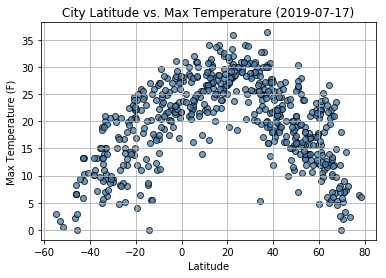

In [8]:
x_axis = df['Lat']
data = df['Max Temp']
plt.scatter(x_axis, data, marker="o", facecolors="steelblue", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Max Temperature ({str(date.today())})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("LatitudevsTemperaturePlot.png")
plt.show()

#### Latitude vs. Humidity Plot

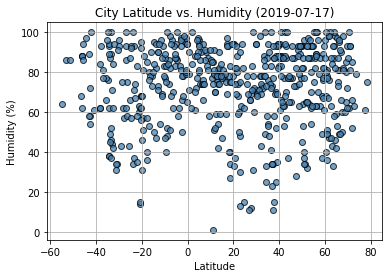

In [9]:
x_axis = df['Lat']
data = df['Humidity']
plt.scatter(x_axis, data, marker="o", facecolors="steelblue", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Humidity ({str(date.today())})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("LatitudevsHumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

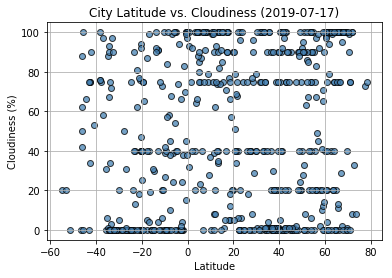

In [10]:
x_axis = df['Lat']
data = df['Cloudiness']
plt.scatter(x_axis, data, marker="o", facecolors="steelblue", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Cloudiness ({str(date.today())})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("LatitudevsCloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

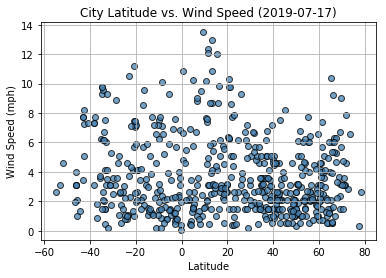

In [11]:
x_axis = df['Lat']
data = df['Wind Speed']
plt.scatter(x_axis, data, marker="o", facecolors="steelblue", edgecolors="black",
            alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs. Wind Speed ({str(date.today())})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("LatitudevsWindSpeedPlot.png")
plt.show()